# Analysis on YouTube Data

In [1]:
#importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_comments = pd.read_csv('UScomments.csv', error_bad_lines=False)
df_comments

C:\Users\chitr\AppData\Local\Temp\ipykernel_13872\4166143743.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_comments = pd.read_csv('UScomments.csv', error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\chitr\AppData\Local\Temp\ipykernel_13872\4166143743.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('UScomments.csv', error_bad_lines=False)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [3]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [4]:
##finding out the missing values in the dataset

df_comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
#dropping the missing values

df_comments.dropna(inplace=True)

In [6]:
[df_comments.isnull().sum()>0]

[video_id        False
 comment_text    False
 likes           False
 replies         False
 dtype: bool]

## Sentiment Analysis

#### Polarity in the comments

In [9]:
#using TextBlob for analysisng the polarity of the comments

from textblob import TextBlob

In [12]:
polarity=[]

for i in df_comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
#Creating new column in the dataset for the polarity level of the comments

df_comments['polarity']=polarity

In [16]:
df_comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


#### Generating the wordcloud

In [26]:
df_neg_comments = df_comments[df_comments['polarity']==-1]
df_pos_comments = df_comments[df_comments['polarity']==1]

In [27]:
#To make a string of all the comments (converting from 1D series to string)
all_neg_comments= ' '.join(df_neg_comments['comment_text'])
all_pos_comments= ' '.join(df_pos_comments['comment_text'])

In [28]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

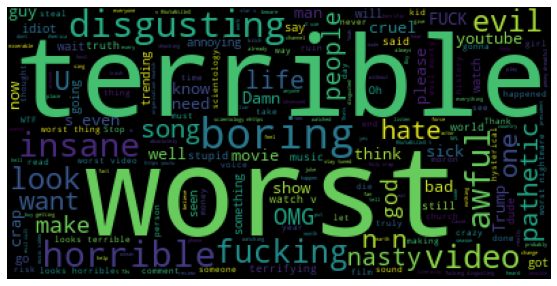

In [29]:
plt.figure(figsize=(15,5))
wc_neg=WordCloud(stopwords=set(STOPWORDS)).generate(all_neg_comments)
plt.imshow(wc_neg)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

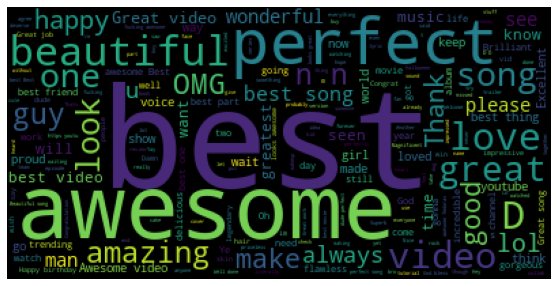

In [30]:
plt.figure(figsize=(15,5))
wc_pos=WordCloud(stopwords=set(STOPWORDS)).generate(all_pos_comments)
plt.imshow(wc_pos)
plt.axis('off')

#### Emoji Analysis

In [40]:
!pip install emoji==1.6.1

  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169313 sha256=7809def80a63aae6e9323d7a545871e6a4f095467fafd82dd0275cf7f0369089
  Stored in directory: c:\users\chitr\appdata\local\pip\cache\wheels\9d\40\e8\bd3514a8af5708171f68cfcb2259a3c22a0578d33ade04a641
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 1.2.0
    Uninstalling emoji-1.2.0:
      Successfully uninstalled emoji-1.2.0


In [38]:
import emoji

In [43]:
#creating a list of all emojis in the comments
emoji_list=[]

for i in df_comments['comment_text']:
    for e in i:
        if e in emoji.distinct_emoji_list(e):
            emoji_list.append(e)

In [44]:
#generating a dict with the emojis as the keys and frequency as the values

freq_emoji = {}
for i in emoji_list:
    if i in freq_emoji:
        freq_emoji[i] += 1
    else:
        freq_emoji[i] = 1

print(freq_emoji)

{'‼': 211, '😉': 998, '😭': 8398, '👍': 5476, '🏻': 3438, '❤': 31119, '😍': 33453, '💋': 968, '💙': 2831, '👈': 126, '😂': 36987, '🔥': 8694, '👻': 268, '💎': 316, '😆': 1149, '😁': 2220, '😒': 629, '👏': 5719, '😊': 3596, '👌': 3112, '🤔': 1592, '💔': 617, '👎': 673, '🍎': 49, '😤': 378, '😢': 2672, '👫': 33, '💘': 702, '😻': 1409, '💖': 5359, '🌟': 549, '😮': 1232, '👇': 151, '😳': 398, '😠': 599, '😴': 187, '😝': 413, '™': 46, '☺': 1180, '😔': 545, '😩': 1472, '😡': 478, '🙏': 1818, '😄': 1496, '😬': 3381, '☹': 173, '🤷': 334, '🤣': 2279, '😃': 1235, '🏽': 1593, '🍏': 56, '😓': 280, '🤦': 390, '♀': 523, '😞': 364, '🏼': 2549, '✌': 835, '💀': 926, '👀': 495, '😱': 2094, '👑': 678, '🌮': 69, '😀': 1734, '💆': 20, '🏿': 501, '♂': 507, '😅': 1070, '🐂': 12, '💩': 925, '💕': 5147, '💓': 1540, '💗': 2144, '💝': 592, '💜': 3429, '😎': 1358, '🎉': 684, '😋': 596, '😘': 5545, '😐': 644, '😕': 453, '🤘': 619, '🙌': 2233, '😏': 623, '😛': 266, '🌳': 10, '🌽': 36, '🎃': 739, '🚣': 15, '🚂': 11, '😑': 487, '✨': 889, '👅': 194, '💦': 427, '🌴': 54, '😫': 692, '😥': 742, '💪': 687, '

In [56]:
# generate a sorted list based on the frequency of the emojis
new_freq_emoji=sorted(freq_emoji.items(), reverse=True, key=lambda x:x[1])
new_freq_emoji

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279),
 ('🙌', 2233),
 ('😁', 2220),
 ('💗', 2144),
 ('😱', 2094),
 ('🙏', 1818),
 ('🌍', 1810),
 ('😀', 1734),
 ('💛', 1677),
 ('🏽', 1593),
 ('🤔', 1592),
 ('💓', 1540),
 ('😄', 1496),
 ('😩', 1472),
 ('💯', 1450),
 ('💞', 1420),
 ('😻', 1409),
 ('😎', 1358),
 ('💚', 1295),
 ('😃', 1235),
 ('😮', 1232),
 ('🏾', 1205),
 ('☺', 1180),
 ('😆', 1149),
 ('🐍', 1143),
 ('😅', 1070),
 ('😙', 1067),
 ('💿', 1031),
 ('😉', 998),
 ('💋', 968),
 ('💀', 926),
 ('💩', 925),
 ('🎶', 906),
 ('🤗', 896),
 ('✨', 889),
 ('🖕', 884),
 ('✌', 835),
 ('🔴', 824),
 ('🖤', 784),
 ('🔵', 759),
 ('😥', 742),
 ('🎃', 739),
 ('💘', 702),
 ('😫', 692),
 ('💪', 687),
 ('🎉', 684),
 ('👑', 678),
 ('👎', 673),
 ('😐', 644),
 ('😇', 640),
 ('😒', 629),
 ('💵', 628),
 ('🙄', 627),
 ('😏', 623),
 

In [58]:
#Getting the top 10 most used emojis in the comments

top_emojis=[new_freq_emoji[:10][i][0] for i in range(10)]
emoji_freq =[new_freq_emoji[:10][i][1] for i in range(10)]

<AxesSubplot:>

C:\Users\chitr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chitr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chitr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chitr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chitr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


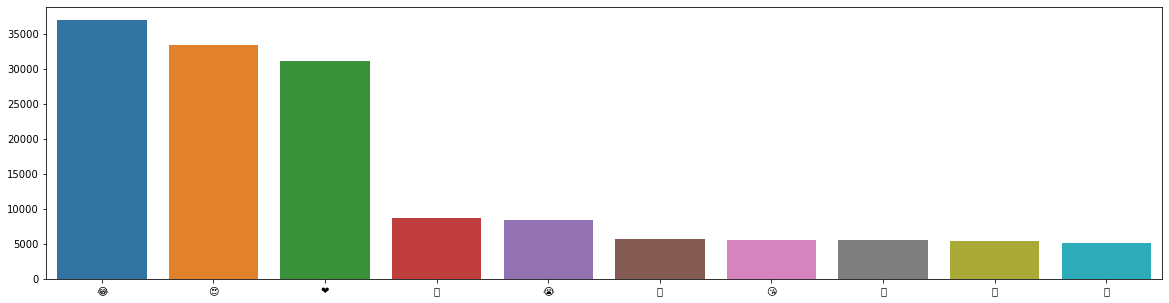

In [60]:
#plotting a barplot for top 10 emojis

plt.figure(figsize=(20,5))
sns.barplot(x=top_emojis, y=emoji_freq)

#### Analysing the youtube videos data

In [61]:
import os

In [63]:
path=r'C:\Users\chitr\Downloads\Youtube_project\additional_data'
files=os.listdir(path)
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [64]:
#List of csv files name
files_csv=[files[i] for i in range(0,len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [65]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

C:\Users\chitr\AppData\Local\Temp\ipykernel_13872\2262871403.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
C:\Users\chitr\AppData\Local\Temp\ipykernel_13872\2262871403.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
C:\Users\chitr\AppData\Local\Temp\ipykernel_13872\2262871403.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
C:\Users\chitr\AppData\Local\Temp\ipykernel_13872\2262871403.py:4: FutureWarning: The error_bad_lines argument has been deprecated

In [66]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [67]:
full_df.shape

(375942, 17)

In [68]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [74]:
category=pd.read_csv('C:/Users/chitr/Downloads/Youtube_project/category_file.txt', sep=':')
category.reset_index(inplace=True)
category.columns=['category_id', 'Category_name']
category

,category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [76]:
df_videos = pd.merge(full_df, category, on='category_id', how='left')
df_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

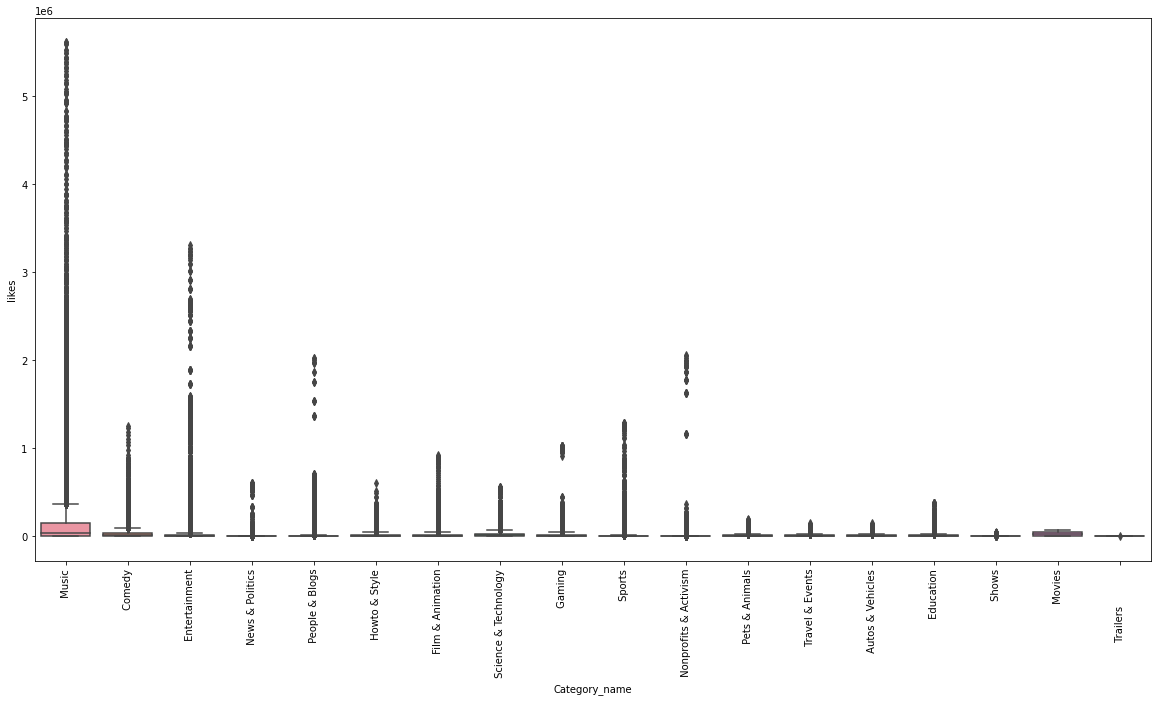

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_videos, x='Category_name', y='likes')
plt.xticks(rotation='90')

#### Analysing the engagement in YouTube

In [80]:
df_videos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [81]:
df_videos['like_rate']=(df_videos['likes']/df_videos['views'])*100
df_videos['dislike_rate']=(df_videos['dislikes']/df_videos['views'])*100
df_videos['comment_count_rate']=(df_videos['comment_count']/df_videos['views'])*100

df_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,4.874563,0.062887,0.253752


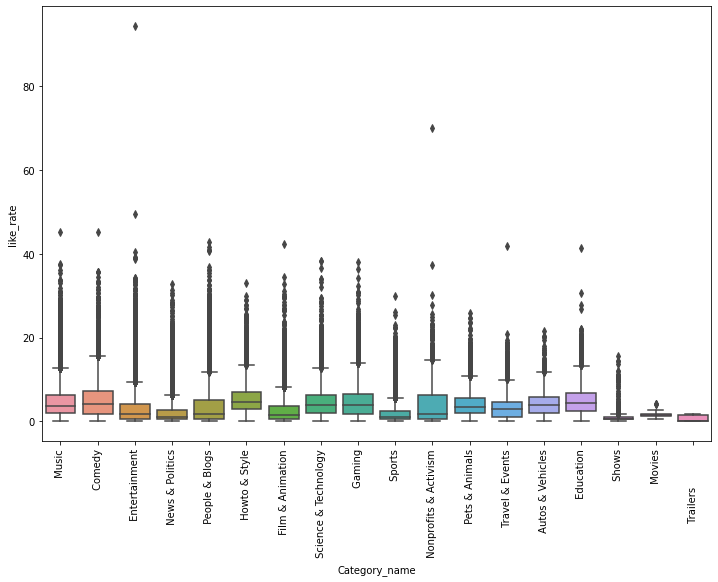

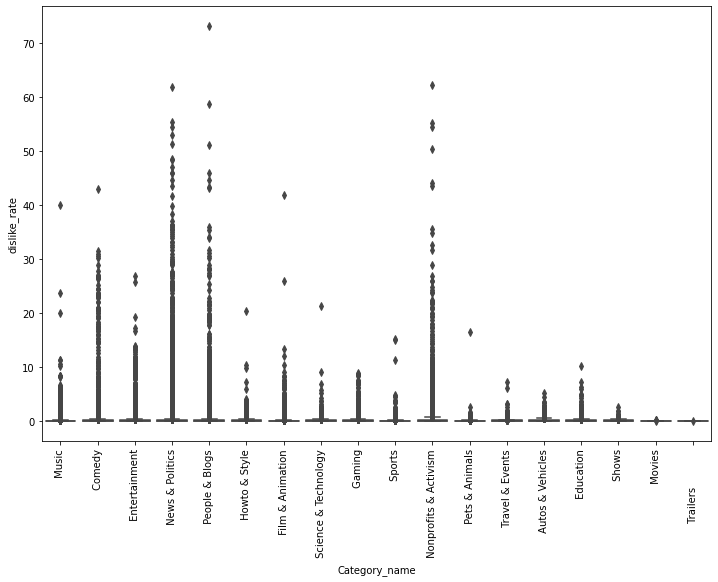

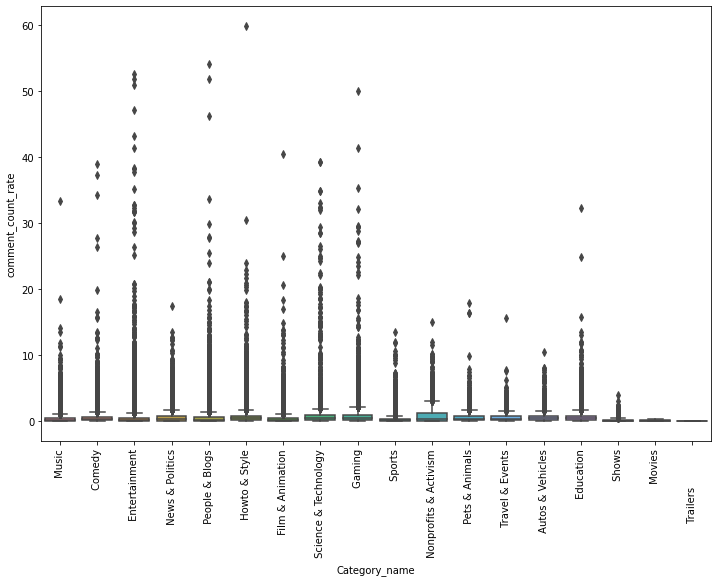

In [83]:
features=['like_rate', 'dislike_rate', 'comment_count_rate']

for i in features:
    plt.figure(figsize=(12,8))
    sns.boxplot(x='Category_name',y=i, data=df_videos)
    plt.xticks(rotation='90')

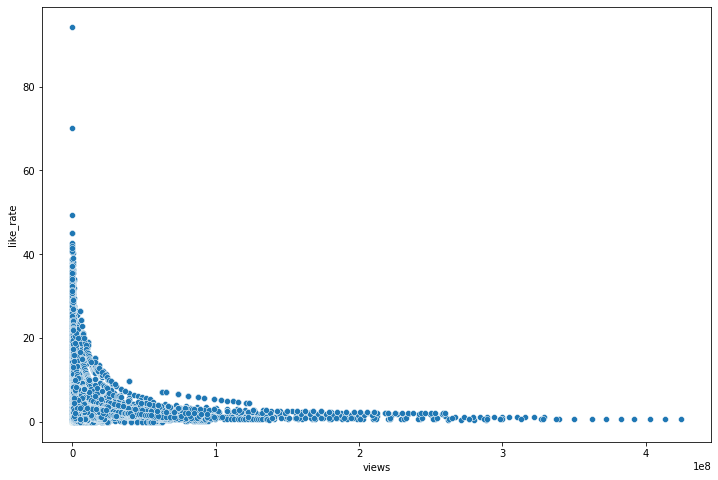

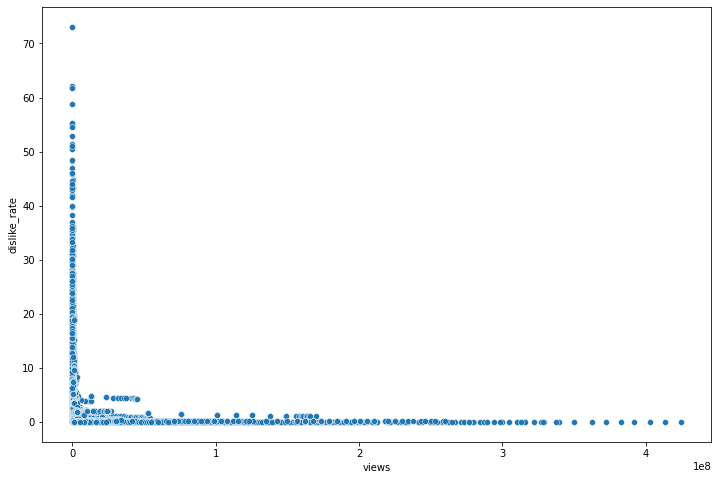

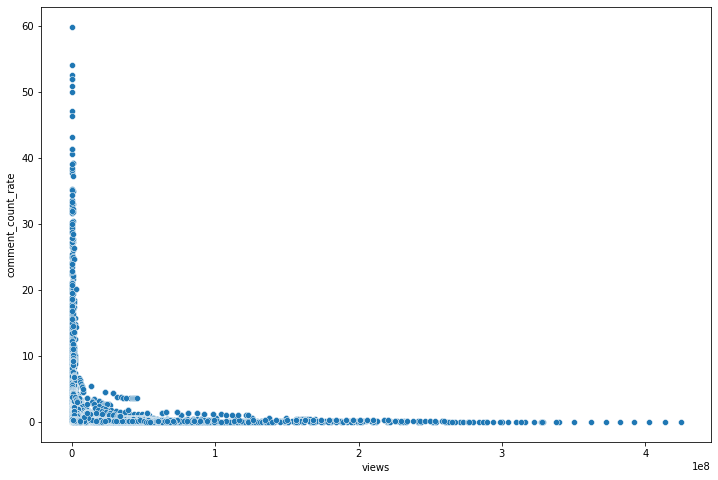

In [86]:
features=['like_rate', 'dislike_rate', 'comment_count_rate']

for i in features:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x='views',y=i, data=df_videos)

###### analysing relationship between views & likes

<AxesSubplot:xlabel='views', ylabel='likes'>

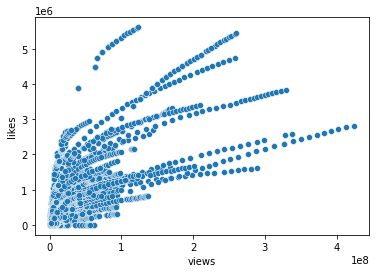

In [89]:
sns.scatterplot(data=df_videos,x='views',y='likes')

<AxesSubplot:xlabel='views', ylabel='likes'>

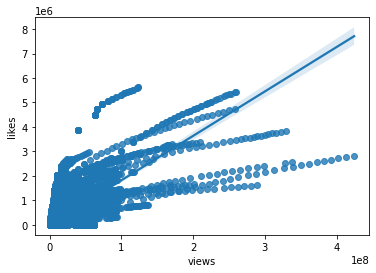

In [87]:
sns.regplot(data=df_videos,x='views',y='likes')

###### finding co-relation values between ['views', 'likes', 'dislikes']

<AxesSubplot:>

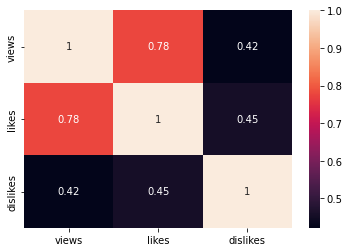

In [88]:
sns.heatmap(df_videos[['views', 'likes', 'dislikes']].corr(),annot=True)

#### Analysing the youtube channels for trending videos

<AxesSubplot:xlabel='channel_title'>

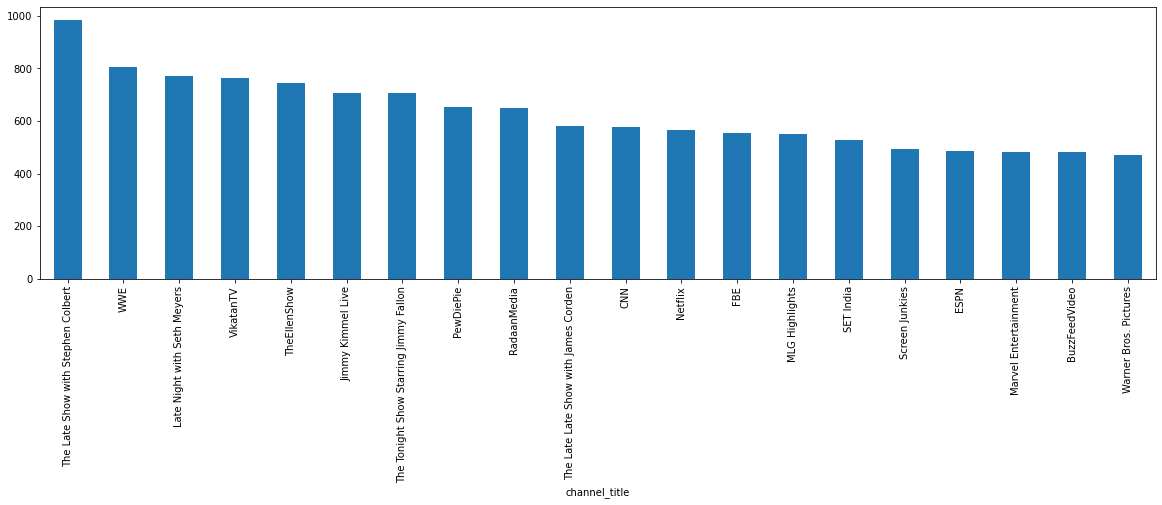

In [97]:
plt.figure(figsize=(20,5))
df_videos.groupby('channel_title')['video_id'].count().sort_values(ascending=False)[:20].plot(kind='bar')